## Task 4: Classification with Logistic Regression.
#### Submitted by Hetal Patel Dholu

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics  import confusion_matrix, precision_score, recall_score, roc_auc_score,accuracy_score,classification_report,roc_curve, auc

In [2]:
breast_Cancer = pd.read_csv("data.csv")

In [3]:
breast_Cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
#dropping unnecesary columns which not be useful for prediction
breast_Cancer.drop(columns=['id','Unnamed: 32'],axis=1,inplace=True)

In [5]:
#checking if they are properly dropped
breast_Cancer.columns ##-> seems they are actually dropped

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
#Now lets encode; Theres only one feature with categories that is  diagnosis = ' M'/'B'
breast_Cancer['diagnosis']=breast_Cancer['diagnosis'].map({'M':1,'B':0})

In [7]:
#check
breast_Cancer['diagnosis'].value_counts ##Yess!!

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64>

In [8]:
#Lets model with Logistic Regression

#define the data
x=breast_Cancer.drop('diagnosis',axis=1)
y=breast_Cancer['diagnosis']

#split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
#scale the features(x) not labels(y)
x_train = StandardScaler().fit_transform(x_train)
x_test= StandardScaler().fit_transform(x_test)

In [10]:
#define model and fit the parameters
log_reg = LogisticRegression(max_iter=5000,random_state=42)
log_reg.fit(x_train,y_train)

#prediting 
y_pred = log_reg.predict(x_test)

In [11]:
#testing the model
accuracy_score = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
precision_score = precision_score(y_test,y_pred)
recall_score = recall_score(y_test,y_pred)
roc_auc_score = roc_auc_score(y_test,y_pred)


In [12]:
#showing the result
print("Accuracy score:",accuracy_score)
print("Precision :",precision_score)
print("recall_score:",recall_score)
print("roc_auc:",roc_auc_score)
print("Classification Report:",classification_report(y_test,y_pred))

Accuracy score: 0.9824561403508771
Precision : 1.0
recall_score: 0.9534883720930233
roc_auc: 0.9767441860465116
Classification Report:               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



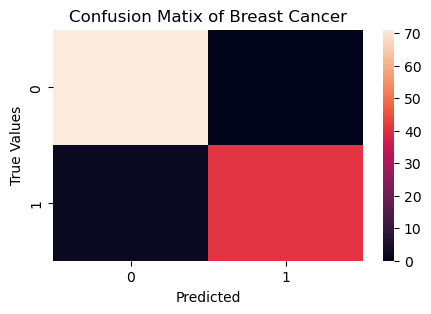

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,3))
sns.heatmap(cm)
plt.title("Confusion Matix of Breast Cancer")
plt.xlabel("Predicted")
plt.ylabel("True Values")
plt.show()

##### Tune threshold and explain sigmoid function.

The Sigmoid Function

The sigmoid function is the heart of Logistic Regression.
It maps any real number (from -∞ to +∞) into a probability between 0 and 1:

𝜎(𝑧) =  1/(1+𝑒^−𝑧)

z = w₀ + w₁x₁ + w₂x₂ + ... + wₙxₙ (linear combination of features)

Output: probability that the instance belongs to the positive class (e.g., Malignant = 1).

Example:

If sigmoid output = 0.85, model says “85% chance tumor is malignant”.

Default decision rule: if probability > 0.5 → predict 1 (Malignant), else 0 (Benign).


##### Tuning the Threshold

By default, Logistic Regression uses 0.5 threshold.
But you can adjust this depending on your goal:

Lower threshold (e.g. 0.3):
→ More tumors predicted malignant (higher recall, fewer false negatives).

Higher threshold (e.g. 0.7):
→ Stricter, fewer malignant predictions (higher precision, fewer false positives).

In [14]:
# Get predicted probabilities
y_prob = log_reg.predict_proba(x_test)[:, 1]  # probability for class 1

# Tune threshold
threshold = 0.3   # try 0.3, 0.5, 0.7
y_pred_new = (y_prob >= threshold).astype(int)
cm  = confusion_matrix(y_test,y_pred_new)
print("Confusion Matrix:\n",cm)# confusion_matrix(y_test, y_pred_new))
print("\nClassification Report:\n", classification_report(y_test, y_pred_new))


Confusion Matrix:
 [[71  0]
 [ 1 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



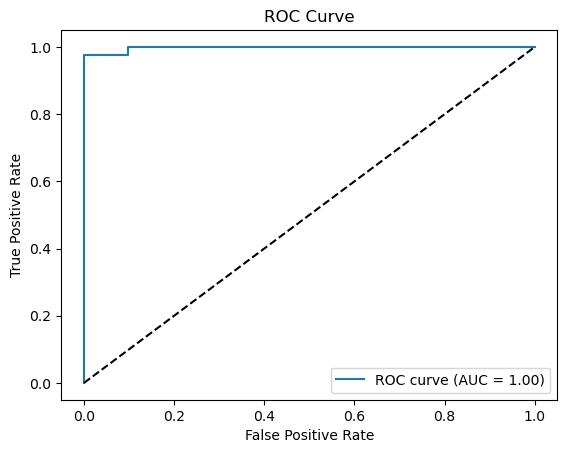

In [15]:
#Visualizing ROC AUC to see trade-off between thresholds:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


__1. How does logistic regression differ from linear regression?__  
Linear Regression predicts a continuous value (e.g., house price).
Logistic Regression predicts a probability (between 0 and 1) using the sigmoid function, and then classifies into categories (e.g., cancer yes/no).
So logistic regression is for classification, not regression.

__2. What is the sigmoid function?__  
The sigmoid squashes any real number into the range (0, 1):
𝜎(𝑧) =  1/(1+𝑒^−𝑧)
If σ(z) ≈ 1 → positive class
If σ(z) ≈ 0 → negative class
This probability is then compared to a threshold (default = 0.5).

__3. What is precision vs recall?__  
Precision: Of all predicted positives, how many are actually positive
Precision =𝑇𝑃/(𝑇𝑃+𝐹𝑃)
(Good when false alarms are costly, e.g., spam detection.)

Recall (Sensitivity): Of all actual positives, how many did we correctly identify?
Recall=𝑇𝑃/(𝑇𝑃+𝐹𝑁)
(Good when missing a positive case is costly, e.g., cancer detection.)

__4. What is the ROC-AUC curve?__  
ROC curve plots True Positive Rate (Recall) vs False Positive Rate at different thresholds.
AUC (Area Under Curve) summarizes the curve:
AUC = 1 → perfect model
AUC = 0.5 → random guessing
It shows how well the model separates classes across all thresholds.

__5. What is the confusion matrix?__  
A 2x2 table that summarizes predictions:
                    Predicted Positive	Predicted Negative
Actual Positive	    True Positive (TP)	False Negative (FN)
Actual Negative	    False Positive (FP)	True Negative (TN)

It helps see where the model is making mistakes.

__6. What happens if classes are imbalanced?__  
If one class dominates (e.g., 95% benign, 5% malignant), the model may just predict the majority class.
Accuracy becomes misleading.
Solutions:
Use Precision, Recall, F1, ROC-AUC instead of accuracy.
Apply resampling (oversample minority, undersample majority).
Use class weights in logistic regression.

__7. How do you choose the threshold?__  
Default is 0.5, but you can adjust based on business needs:
Lower threshold → higher recall (catch more positives, useful in medical diagnosis).
Higher threshold → higher precision (fewer false alarms, useful in fraud detection).
ROC curve or Precision-Recall curve can help find the “best” threshold (e.g., using Youden’s J statistic or maximizing F1 score).

__8. Can logistic regression be used for multi-class problems?__  
Yes.
One-vs-Rest (OvR): Train a logistic regression per class vs all others.
Multinomial Logistic Regression (softmax): Generalization of sigmoid for multiple classes.
Sklearn’s LogisticRegression(multi_class='multinomial', solver='lbfgs') supports this.